In [1]:
# config
import sys
import numpy as np
import torch
assert torch.cuda.is_available()
%matplotlib inline
cuda_device = torch.device("cuda:0")
torch.cuda.set_device(cuda_device)
from config import config
setting = config(
    cuda_device, 
    model_save_name="/home/zzn/PycharmProjects/RESNET_FPN/StateDicts/RESFPN_ADAMDILATION_A_7_6.pkl", 
    dataset_name="SHA",
    lr=1e-4, 
    batch_size=5, 
    eval_per_step=120
)

In [2]:
from Dataset.DatasetConstructor import TrainDatasetConstructor,EvalDatasetConstructor
eval_dataset = EvalDatasetConstructor(
    setting.eval_num,
    setting.eval_img_path,
    setting.eval_gt_map_path,
    setting.eval_pers_path,
    mode=setting.mode,
    dataset_name=setting.dataset_name,
    device=setting.cuda_device)
eval_loader = torch.utils.data.DataLoader(dataset=eval_dataset, batch_size=1)

In [4]:
# model construct
from net.RES_FPN.FPN import FPN
from eval.Estimator import Estimator
net = FPN().to(setting.cuda_device)
net.load_state_dict(torch.load("/home/zzn/PycharmProjects/RESNET_FPN/StateDicts/RESFPN_A_7_6.pkl"))
optimizer = torch.optim.Adam(net.parameters(), setting.learning_rate)
criterion = torch.nn.MSELoss(reduction='sum').to(setting.cuda_device)
estimator = Estimator(setting, eval_loader, criterion=criterion)

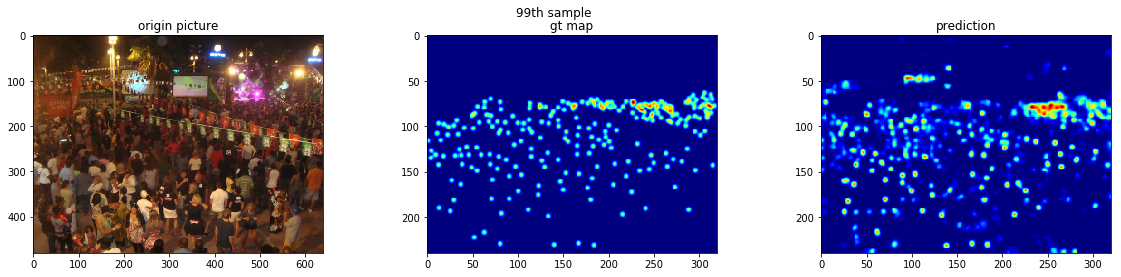

The gt counts of the above sample:242, and the pred counts:200.5142059326172
loss = 6.739440885218945, eval_mae = 58.10285949707031, eval_rmse = 99.37541198730469, time cost eval = 27.407204389572144s


In [6]:
import warnings
import time
validate_MAE, validate_RMSE, validate_loss, time_cost = estimator.evaluate(net, True)
sys.stdout.write('loss = {}, eval_mae = {}, eval_rmse = {}, time cost eval = {}s\n'
                .format(validate_loss, validate_MAE, validate_RMSE, time_cost))
sys.stdout.flush()